# Linear discriminant analysis (using Python)
Supervised data compression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
dfX = pd.DataFrame(X)
dfX.columns = dataObj.feature_names
display(dfX.head())
print(dfX.shape)

# Standardize the original dataset (very important)
sc = StandardScaler()
X_std = sc.fit_transform(X)
temp = pd.DataFrame(data=X_std, columns=dfX.columns)
display(temp.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Compute the "scaled" within-class scatter matrix
This is essentially covariance matrix


In [2]:
# Number of features
d = X_std.shape[1]

# Scaled within-class scatter matrix
S_W = np.zeros((d, d))

for label in np.unique(y):
    S_i = np.cov(X_std[y == label], rowvar=False)
    S_W += S_i

df = pd.DataFrame(S_W)
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.196475,0.043422,-0.126706,-0.083336,0.001538,0.182343,0.091196,-0.015196,0.170527,0.426015,0.010909,-0.007369,0.138215
1,0.043422,2.166809,0.181691,0.302867,-0.176870,-0.086390,-0.055911,0.224473,0.010101,-0.317786,-0.424731,0.157633,-0.263763
2,-0.126706,0.181691,2.475013,1.502473,0.518397,0.296831,0.289083,0.549877,0.058768,0.056994,0.130608,0.154197,-0.029520
3,-0.083336,0.302867,1.502473,2.056262,0.220854,0.161229,0.188527,0.302350,0.147567,-0.012097,-0.023058,0.235035,-0.097871
4,0.001538,-0.176870,0.518397,0.220854,2.511840,0.177720,0.165846,-0.516188,0.422178,0.173251,0.090544,-0.083547,0.270516
5,0.182343,-0.086390,0.296831,0.161229,0.177720,1.385769,0.691828,-0.189243,0.753187,0.440327,-0.038890,0.355682,0.129429
6,0.091196,-0.055911,0.289083,0.188527,0.165846,0.691828,0.748059,-0.373674,0.617379,0.373943,-0.060292,0.221534,0.036996
7,-0.015196,0.224473,0.549877,0.302350,-0.516188,-0.189243,-0.373674,2.316895,-0.274618,-0.012441,0.165702,-0.263626,-0.008325
8,0.170527,0.010101,0.058768,0.147567,0.422178,0.753187,0.617379,-0.274618,2.147221,0.623597,-0.164454,0.251136,0.189441
9,0.426015,-0.317786,0.056994,-0.012097,0.173251,0.440327,0.373943,-0.012441,0.623597,1.446415,-0.286958,-0.122939,0.287142


## Calculate the mean vectors $\mu_i$ calculated from sample from class $i$

In [3]:
mvs = []

for label in np.unique(y):
    mv = np.mean(X_std[y == label, :], axis=0)
    mvs.append(mv)
    #mv_print = ", ".join(f"{i:5.2f}" for i in mv)
    #print(f"Label={label}, MV:{mv_print}")

df = pd.DataFrame(mvs)
df.index.name = 'Label'
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Label,,,,,,,,,,,,,
0,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501
1,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110
2,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578


## Calculate the mean vector $\mu$ computed all from observations
(Actually this will give all zeros becuase data is already standardized.)

In [4]:
mva = np.mean(X_std, axis=0).reshape(d,1) # make column vector

## Compute the between-class scatter matrix

In [5]:
S_B = np.zeros((d, d))
for label, mv in zip(np.unique(y), mvs):
    # Count number of obervation in each class
    n = X_std[y == label, :].shape[0]
    # Mean values for each class
    mv = mv.reshape(d, 1)  # make column vector
    mmm = mv - mva
    # Outer product
    S_B += n * mmm @ mmm.T

df = pd.DataFrame(S_B)
display(df)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,108.024413,15.216691,48.171603,-48.911190,47.929895,42.073792,37.241323,-26.056175,17.980091,74.206727,-13.512763,14.399267,106.158181
1,15.216691,52.842725,16.917035,31.788171,0.094933,-56.013688,-71.675201,39.270110,-44.027736,61.898805,-70.872443,-75.954484,-17.640189
2,48.171603,16.917035,23.505885,-14.081931,20.043281,6.384307,1.235685,-3.038345,-1.286442,43.371797,-19.808107,-9.162490,40.826012
3,-48.911190,31.788171,-14.081931,51.653013,-26.779937,-66.303827,-75.544491,44.556563,-43.661546,5.648248,-46.497483,-66.012026,-72.931846
4,47.929895,0.094933,20.043281,-26.779937,22.140250,26.800488,26.623273,-17.198932,14.090908,26.170500,3.059846,16.627760,51.381338
5,42.073792,-56.013688,6.384307,-66.303827,26.800488,92.060910,108.481094,-62.609752,63.886878,-33.950071,78.997870,100.881544,81.167701
6,37.241323,-71.675201,1.235685,-75.544491,26.623273,108.481094,129.544038,-74.132333,76.840394,-52.471092,99.981565,123.280033,86.049709
7,-26.056175,39.270110,-3.038345,44.556563,-17.198932,-62.609752,-74.132333,42.653977,-43.771988,25.673631,-55.154932,-69.521883,-53.211992
8,17.980091,-44.027736,-1.286442,-43.661546,14.090908,63.886878,76.840394,-43.771988,45.752254,-34.894755,61.089656,74.013458,47.602690
9,74.206727,61.898805,43.371797,5.648248,26.170500,-33.950071,-52.471092,25.673631,-34.894755,103.179192,-79.267061,-69.239611,39.850791


## Computer eigenvalues and eigenvectors
Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Print
display(pd.DataFrame(eigen_vals.real.reshape(1,-1)))
display(pd.DataFrame(eigen_vecs.real))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,243.232619,546.416494,8.492775e-14,6.852721e-15,6.852721e-15,3.027765e-14,-2.576213e-14,-1.414510e-15,-1.414510e-15,-9.330532e-15,-1.082995e-15,9.501448e-15


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.775173,-0.422459,-0.130113,-0.505733,-0.060639,-0.060639,0.454841,0.664068,-0.641890,-0.641890,-0.723194,-0.778326,-0.683853
1,-0.105528,-0.182322,0.072531,-0.008023,-0.014527,-0.014527,0.215582,-0.384817,0.079404,0.079404,0.268283,0.104766,0.000668
2,-0.270561,-0.390518,-0.041110,0.059816,0.085537,0.085537,-0.557604,-0.235341,0.418462,0.418462,0.334037,0.264048,-0.000607
3,0.246029,0.296636,0.209971,0.400084,-0.227368,-0.227368,-0.166115,0.255577,-0.045830,-0.045830,-0.183972,-0.244664,-0.323213
4,-0.007649,-0.007713,-0.010982,-0.054200,0.015460,0.015460,-0.006642,-0.049887,-0.035584,-0.035584,-0.009342,0.022179,0.040277
5,0.043719,0.010930,0.160635,0.459462,0.088147,0.088147,0.238290,0.021698,0.019423,0.019423,-0.061359,-0.046136,0.072839
6,0.019528,0.277789,-0.733756,-0.238837,0.020384,0.020384,0.101240,0.029179,0.071717,0.071717,-0.077597,-0.020513,-0.102880
7,0.059841,0.115343,-0.076418,0.078881,-0.014272,-0.014272,-0.147561,0.017524,-0.043050,-0.043050,-0.105110,-0.061795,-0.165084
8,0.088101,0.123705,0.023588,-0.049048,0.032006,0.032006,0.179007,0.201959,-0.070012,-0.070012,-0.091340,-0.084330,-0.270078
9,-0.118099,-0.279262,0.303191,0.248803,0.356691,0.356691,-0.091411,-0.140122,-0.065059,-0.065059,0.040708,0.123412,0.025285


## Sort eigenvectors in decreasing order of the eigenvalues

In [7]:
#Sort eigenvalues
idx = np.argsort(eigen_vals)
idx = idx[::-1] #Sort from max to min
eigen_vals = eigen_vals[idx]
eigen_vecs = eigen_vecs[:,idx]

# Print
display(pd.DataFrame(eigen_vals.real.reshape(1,-1)))
display(pd.DataFrame(eigen_vecs.real))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,546.416494,243.232619,8.492775e-14,3.027765e-14,9.501448e-15,6.852721e-15,6.852721e-15,0.0,-1.082995e-15,-1.414510e-15,-1.414510e-15,-9.330532e-15,-2.576213e-14


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.130113,-0.422459,-0.505733,0.454841,-0.683853,-0.060639,-0.060639,0.775173,-0.778326,-0.641890,-0.641890,-0.723194,0.664068
1,0.072531,-0.182322,-0.008023,0.215582,0.000668,-0.014527,-0.014527,-0.105528,0.104766,0.079404,0.079404,0.268283,-0.384817
2,-0.041110,-0.390518,0.059816,-0.557604,-0.000607,0.085537,0.085537,-0.270561,0.264048,0.418462,0.418462,0.334037,-0.235341
3,0.209971,0.296636,0.400084,-0.166115,-0.323213,-0.227368,-0.227368,0.246029,-0.244664,-0.045830,-0.045830,-0.183972,0.255577
4,-0.010982,-0.007713,-0.054200,-0.006642,0.040277,0.015460,0.015460,-0.007649,0.022179,-0.035584,-0.035584,-0.009342,-0.049887
5,0.160635,0.010930,0.459462,0.238290,0.072839,0.088147,0.088147,0.043719,-0.046136,0.019423,0.019423,-0.061359,0.021698
6,-0.733756,0.277789,-0.238837,0.101240,-0.102880,0.020384,0.020384,0.019528,-0.020513,0.071717,0.071717,-0.077597,0.029179
7,-0.076418,0.115343,0.078881,-0.147561,-0.165084,-0.014272,-0.014272,0.059841,-0.061795,-0.043050,-0.043050,-0.105110,0.017524
8,0.023588,0.123705,-0.049048,0.179007,-0.270078,0.032006,0.032006,0.088101,-0.084330,-0.070012,-0.070012,-0.091340,0.201959
9,0.303191,-0.279262,0.248803,-0.091411,0.025285,0.356691,0.356691,-0.118099,0.123412,-0.065059,-0.065059,0.040708,-0.140122


## Visualizing "discriminability"

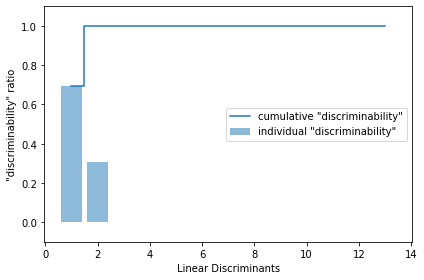

In [8]:
tot = sum(eigen_vals.real)
discr = eigen_vals.real/tot
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

## Transformation matrix, W

In [9]:
w = eigen_vecs[:,[0,1]].real
display(pd.DataFrame(w))

,0,1
0,-0.130113,-0.422459
1,0.072531,-0.182322
2,-0.041110,-0.390518
3,0.209971,0.296636
4,-0.010982,-0.007713
5,0.160635,0.010930
6,-0.733756,0.277789
7,-0.076418,0.115343
8,0.023588,0.123705
9,0.303191,-0.279262


## Projecting samples onto the new feature space

In [10]:
X_std_lda = X_std.dot(w)

display(pd.DataFrame(X_std_lda))

,0,1
0,-2.063220,-1.127717
1,-1.832634,-0.711564
2,-1.530293,-0.798860
3,-1.882749,-2.341960
4,-0.664820,-0.285375
...,...,...
173,1.861822,-1.984871
174,1.950794,-1.237388
175,2.142482,-1.844683
176,1.838683,-1.445719


## Visualizing data

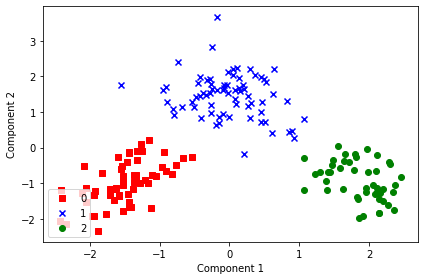

In [11]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()